In [2]:
import arviz as az
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpyro
import numpyro.distributions as dist
from jax import random
from numpyro.infer import MCMC, NUTS

# Model
def model(data):
    theta = numpyro.sample('theta', dist.Dirichlet(jnp.repeat(1, 5)))
    obs = numpyro.sample('obs', dist.MultinomialProbs(theta), obs=data)

# Data
data = jnp.array([3, 20, 68, 249, 160])

In [3]:
# Inference
kernel = NUTS(model)
mcmc = MCMC(kernel, num_warmup=1000, num_samples=2000, thinning=1)
rng_key = random.PRNGKey(12345)
mcmc.run(rng_key, data=data)

samples = mcmc.get_samples()
mcmc.print_summary()

#               mean       std    median      5.0%     95.0%     n_eff     r_hat
# theta[0]      0.01      0.00      0.01      0.00      0.01   2206.29      1.00
# theta[1]      0.04      0.01      0.04      0.03      0.06   2184.10      1.00
# theta[2]      0.14      0.01      0.14      0.11      0.16   2267.53      1.00
# theta[3]      0.50      0.02      0.50      0.46      0.53   2169.73      1.00
# theta[4]      0.32      0.02      0.32      0.29      0.35   2186.89      1.00

sample: 100%|██████████| 3000/3000 [00:02<00:00, 1499.60it/s, 7 steps of size 7.36e-01. acc. prob=0.92]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
  theta[0]      0.01      0.00      0.01      0.00      0.01   2206.29      1.00
  theta[1]      0.04      0.01      0.04      0.03      0.06   2184.10      1.00
  theta[2]      0.14      0.01      0.14      0.11      0.16   2267.53      1.00
  theta[3]      0.50      0.02      0.50      0.46      0.53   2169.73      1.00
  theta[4]      0.32      0.02      0.32      0.29      0.35   2186.89      1.00

Number of divergences: 0


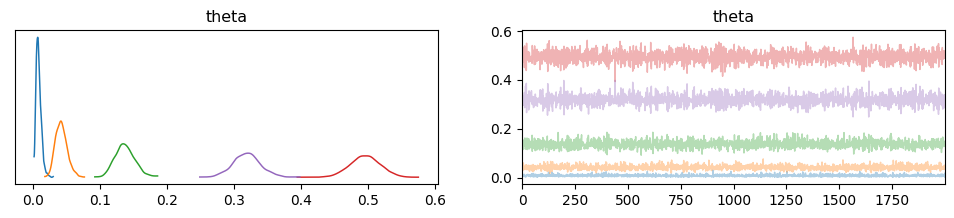

In [4]:
az.plot_trace(az.from_numpyro(mcmc))
plt.show()

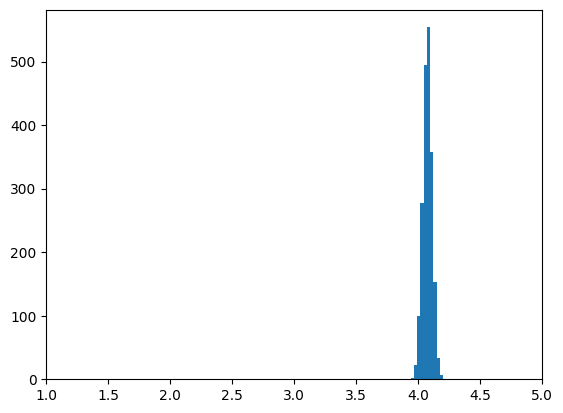

In [22]:
# means = samples['theta'] @ jnp.array([1, 2, 3, 4, 5])
plt.hist(samples['mean'])
plt.xlim([1, 5])
plt.show()